In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [4]:
data.shape

(517, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data.shape

(517, 31)

In [9]:
data = data.drop_duplicates()
data.shape

(509, 31)

In [10]:
data1 = data.iloc[:,0:11]
data1['size_category'] = data['size_category']
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [11]:
data_get_dummies = data.iloc[:,2:]
data_get_dummies.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [12]:
data['month'].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [13]:
data['day'].value_counts()

sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

In [14]:
data['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

### Compairing different columns w.r.t  'y'

In [15]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['large'], label = 'large', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['small'], label = 'small',bottom= data_col1['large'], color= colors[1])
    ax1.set_title('comparision', fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    sns.countplot(x=col1, data=data,hue=col2 , ax = ax2)
    plt.xticks( rotation = 45, fontsize = 12)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


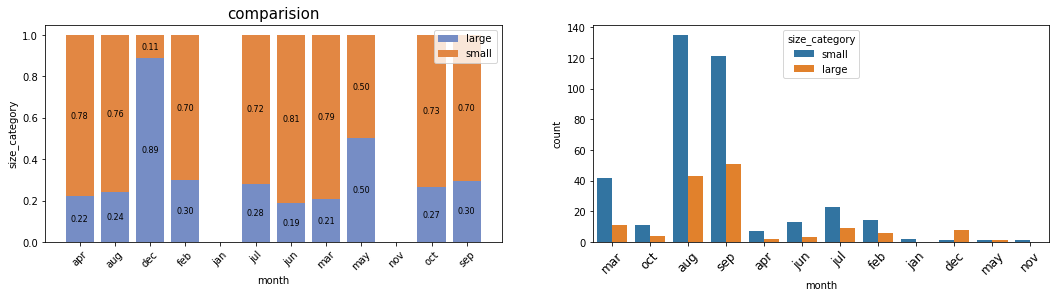

In [16]:
plot_rate_bar(data,'month','size_category')

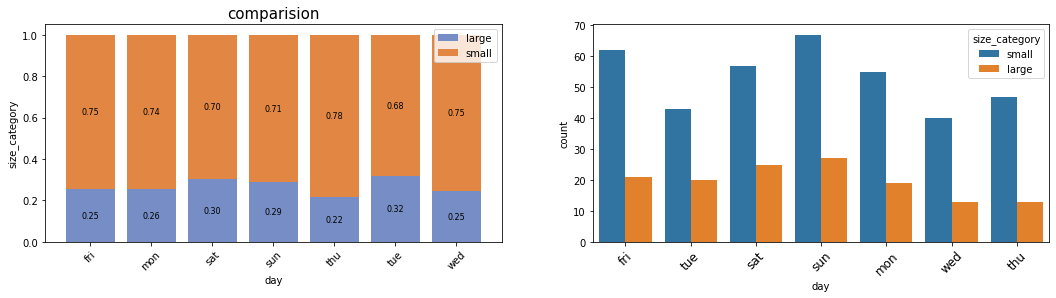

In [17]:
plot_rate_bar(data,'day','size_category')

In [18]:
des = data1.groupby(['size_category']).agg(['mean' , 'std'])
des

FFMC                   DMC                     DC  \
                    mean       std        mean        std        mean   
size_category                                                           
large          90.839130  4.110578  115.105797  67.948994  559.322464   
small          90.535849  6.007818  108.424259  62.190240  543.497035   

                                ISI                 temp                   RH  \
                      std      mean       std       mean       std       mean   
size_category                                                                   
large          239.603775  8.964493  4.208885  18.960870  6.752879  43.188406   
small          251.498946  9.045553  4.722602  18.829919  5.473019  44.649596   

                              wind                rain                 area  \
                     std      mean       std      mean       std       mean   
size_category                                                                 
large          15.915172  4.186957  1.850895  0.046377  0.544804  45.617971   
small          16.533050  3.946092  1.780102  0.010782  0.101301   0.857439   

                           
                      std  
size_category              
large          117.364722  
small            1.489998

In [19]:
data_summary = data1.describe()
data_summary.loc['skewness'] = data1.skew()
data_summary.loc['kurtosis'] = data1.kurtosis()
data_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000
skewness,-6.540474,0.558596,-1.100245,2.529891,-0.321869,0.869644,0.581689,20.044822,12.753940
kurtosis,66.255682,0.251618,-0.242656,21.288771,0.101560,0.447242,0.043986,426.542289,191.265722


### Data Transformation

In [20]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [21]:
num_cols = list(data_summary.columns)
cat_cols = ['month','day','size_category']
data2 = data[num_cols]
data2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
#Data Transformation i.e. Normalize the data set
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0.1 , 1.1))
minmax = minmax.fit_transform(data2)
data_norm = pd.DataFrame(data = minmax , columns = data2.columns)
data_norm.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.970968,0.186492,0.201325,0.190909,0.292926,0.523529,0.800000,0.10000,0.1
1,1.027742,0.218194,0.875419,0.219430,0.608039,0.311765,0.155556,0.10000,0.1
2,1.027742,0.246795,0.896294,0.219430,0.498714,0.311765,0.200000,0.10000,0.1
3,1.041935,0.210958,0.181623,0.260428,0.296141,1.064706,0.500000,0.13125,0.1
4,1.010968,0.272984,0.210590,0.271123,0.395820,1.088235,0.255556,0.10000,0.1


In [23]:
data_summary = data1.agg(['skew', 'kurtosis']).transpose()
data_summary

,skew,kurtosis
FFMC,-6.540474,66.255682
DMC,0.558596,0.251618
DC,-1.100245,-0.242656
ISI,2.529891,21.288771
temp,-0.321869,0.101560
RH,0.869644,0.447242
wind,0.581689,0.043986
rain,20.044822,426.542289
area,12.753940,191.265722


In [24]:
data_norm_summary = data_norm.agg(['skew', 'kurtosis']).transpose()
data_norm_summary

,skew,kurtosis
FFMC,-6.540474,66.255682
DMC,0.558596,0.251618
DC,-1.100245,-0.242656
ISI,2.529891,21.288771
temp,-0.321869,0.101560
RH,0.869644,0.447242
wind,0.581689,0.043986
rain,20.044822,426.542289
area,12.753940,191.265722


In [25]:
# Box-Cox Transformation
data_boxcox = pd.DataFrame()
from scipy.stats import boxcox

for i in range(data_norm.shape[1]):
    fitted_data, fitted_lambda = boxcox(data_norm.iloc[:,i])
    data_boxcox[num_cols[i]] = fitted_data

data_boxcox.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.507082e+78,-7.524981e+08
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.507082e+78,-7.524981e+08
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.507082e+78,-7.524981e+08
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-8.228726e+68,-7.524981e+08
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.507082e+78,-7.524981e+08


In [26]:
data_boxcox_summary = data_boxcox.agg(['skew', 'kurtosis']).transpose()
data_boxcox_summary

,skew,kurtosis
FFMC,-0.320078,0.401496
DMC,-0.039353,-0.266361
DC,-0.716214,-0.781336
ISI,0.004529,1.474461
temp,-0.048075,-0.049870
RH,-0.006408,-0.327295
wind,-0.020245,-0.346688
rain,8.375044,NaN
area,1.139212,-0.074407


In [27]:
# sqrt Transformation
data_sqrt = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.power(data_norm.iloc[:,i] , 1/2)
    data_sqrt[num_cols[i]] = fitted_data
    
data_sqrt.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.985377,0.431847,0.448693,0.436931,0.541226,0.723553,0.894427,0.316228,0.316228
1,1.013776,0.467113,0.935638,0.468433,0.779768,0.558359,0.394405,0.316228,0.316228
2,1.013776,0.496785,0.946728,0.468433,0.706197,0.558359,0.447214,0.316228,0.316228
3,1.020752,0.459302,0.426173,0.510321,0.544189,1.031846,0.707107,0.362284,0.316228
4,1.005469,0.522479,0.458901,0.520695,0.629142,1.043185,0.505525,0.316228,0.316228


In [28]:
data_sqrt_summary = data_sqrt.agg(['skew', 'kurtosis']).transpose()
data_sqrt_summary

,skew,kurtosis
FFMC,-9.574197,132.567926
DMC,-0.083626,-0.276036
DC,-1.322995,0.237079
ISI,0.871686,5.092812
temp,-0.876132,0.995026
RH,0.376794,-0.263655
wind,0.089628,-0.352889
rain,17.214101,330.983954
area,9.167830,108.267435


In [29]:
# sq Transformation
data_sq = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.power(data_norm.iloc[:,i] , 2)
    data_sq[num_cols[i]] = fitted_data
    
    
data_sq.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.942778,0.034779,0.040532,0.036446,0.085806,0.274083,0.640000,0.010000,0.01
1,1.056253,0.047609,0.766359,0.048149,0.369711,0.097197,0.024198,0.010000,0.01
2,1.056253,0.060908,0.803343,0.048149,0.248715,0.097197,0.040000,0.010000,0.01
3,1.085630,0.044503,0.032987,0.067823,0.087700,1.133599,0.250000,0.017227,0.01
4,1.022056,0.074520,0.044348,0.073508,0.156673,1.184256,0.065309,0.010000,0.01


In [30]:
data_sq_summary = data_sq.agg(['skew', 'kurtosis']).transpose()
data_sq_summary

,skew,kurtosis
FFMC,-3.858901,23.661571
DMC,1.736344,3.257504
DC,-0.666800,-0.824472
ISI,10.651715,178.390168
temp,0.563749,0.328077
RH,1.824689,3.748242
wind,1.513272,2.501804
rain,22.260153,499.581624
area,17.484493,327.183773


In [31]:
# log Transformation
data_log = pd.DataFrame()

for i in range(data_norm.shape[1]):
    fitted_data= np.log(data_norm.iloc[:,i])
    data_log[num_cols[i]] = fitted_data
    
    
data_log.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.029462,-1.679367,-1.602834,-1.655958,-1.227835,-0.647162,-0.223144,-2.302585,-2.302585
1,0.027364,-1.522369,-0.133052,-1.516724,-0.497517,-1.165507,-1.860752,-2.302585,-2.302585
2,0.027364,-1.399196,-0.109487,-1.516724,-0.695723,-1.165507,-1.609438,-2.302585,-2.302585
3,0.041080,-1.556096,-1.705822,-1.345430,-1.216918,0.062699,-0.693147,-2.030651,-2.302585
4,0.010908,-1.298342,-1.557843,-1.305183,-0.926796,0.084557,-1.364315,-2.302585,-2.302585


In [32]:
data_log_summary = data_log.agg(['skew', 'kurtosis']).transpose()
data_log_summary

,skew,kurtosis
FFMC,-14.176835,254.344151
DMC,-0.711414,0.051765
DC,-1.548942,0.878206
ISI,-0.044039,1.389946
temp,-1.545628,3.107480
RH,-0.158087,-0.226930
wind,-0.451080,0.029142
rain,13.990804,224.060974
area,6.202853,51.672670


In [33]:
# Mixed transformation [0:7] we take from boxcox and remaining two we take from logerithmic

trf_data = data_boxcox.iloc[:,:7]
trf_data['rain'] = data_log['rain']
trf_data['area'] = data_log['area']
trf_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585


In [34]:
final_data = trf_data.copy()
final_data1 = data_norm.copy()
final_data[cat_cols] = data1[cat_cols]
final_data1[cat_cols] = data1[cat_cols]
final_data['size_category'] = final_data['size_category'].map({'small':0 , 'large':1})
final_data1['size_category'] = final_data1['size_category'].map({'small':0 , 'large':1})
final_data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,0.970968,0.186492,0.201325,0.190909,0.292926,0.523529,0.800000,0.10000,0.1,mar,fri,0.0
1,1.027742,0.218194,0.875419,0.219430,0.608039,0.311765,0.155556,0.10000,0.1,oct,tue,0.0
2,1.027742,0.246795,0.896294,0.219430,0.498714,0.311765,0.200000,0.10000,0.1,oct,sat,0.0
3,1.041935,0.210958,0.181623,0.260428,0.296141,1.064706,0.500000,0.13125,0.1,mar,fri,0.0
4,1.010968,0.272984,0.210590,0.271123,0.395820,1.088235,0.255556,0.10000,0.1,mar,sun,0.0


In [35]:
data_get_dummies[num_cols] = trf_data
data_get_dummies['size_category'] = data_get_dummies['size_category'].map({'small':0 , 'large':1})
data_get_dummies.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,0,...,0,0,0,0,1,0,0,0,0,0


### Encoded using Target Encoder

In [36]:
final_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,mar,fri,0.0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,oct,tue,0.0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,oct,sat,0.0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,mar,fri,0.0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,mar,sun,0.0


In [37]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.5 MB/s 


In [38]:
from category_encoders import TargetEncoder

tr = TargetEncoder()

final_data.iloc[:,-2] = tr.fit_transform(final_data.iloc[:,-2],final_data.iloc[:,-1])
final_data.iloc[:,-3] = tr.fit_transform(final_data.iloc[:,-3],final_data.iloc[:,-1])

final_data1.iloc[:,-2] = tr.fit_transform(final_data1.iloc[:,-2],final_data1.iloc[:,-1])
final_data1.iloc[:,-3] = tr.fit_transform(final_data1.iloc[:,-3],final_data1.iloc[:,-1])
final_data1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,0.970968,0.186492,0.201325,0.190909,0.292926,0.523529,0.800000,0.10000,0.1,0.207547,0.259259,0.0
1,1.027742,0.218194,0.875419,0.219430,0.608039,0.311765,0.155556,0.10000,0.1,0.266667,0.322581,0.0
2,1.027742,0.246795,0.896294,0.219430,0.498714,0.311765,0.200000,0.10000,0.1,0.266667,0.308642,0.0
3,1.041935,0.210958,0.181623,0.260428,0.296141,1.064706,0.500000,0.13125,0.1,0.207547,0.259259,0.0
4,1.010968,0.272984,0.210590,0.271123,0.395820,1.088235,0.255556,0.10000,0.1,0.207547,0.266667,0.0


In [39]:
final_data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
month            8
day              8
size_category    8
dtype: int64

In [40]:
data_get_dummies = data_get_dummies.dropna()

In [41]:
data_get_dummies.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
data_get_dummies.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [43]:
final_data = final_data.dropna()

In [44]:
final_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,0.207547,0.259259,0.0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,0.266667,0.322581,0.0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,0.266667,0.308642,0.0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,0.207547,0.259259,0.0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,0.207547,0.266667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
503,-0.058273,-0.902669,-0.121336,-1.946594,-0.076001,-1.015584,-0.849582,-2.302585,-2.302585,0.233918,0.245283,0.0
504,-0.058273,-0.902669,-0.121336,-1.946594,-0.076001,-1.110760,-0.849582,-2.302585,-2.245225,0.233918,0.245283,1.0
505,-0.058273,-0.902669,-0.121336,-1.946594,-0.255823,-0.270882,-0.332782,-2.302585,-1.898661,0.233918,0.216667,0.0
506,-0.058273,-0.902669,-0.121336,-1.946594,-0.276359,-0.285917,-0.213630,-2.302585,-2.205180,0.233918,0.259259,0.0


In [45]:
final_data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
month            0
day              0
size_category    0
dtype: int64

### Feature Engineering

In [46]:
from sklearn.tree import  DecisionTreeClassifier

In [47]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [48]:
#Feature Extraction 
feature_model = DecisionTreeClassifier()
feature_model.fit(X,y)

DecisionTreeClassifier()

In [49]:
np.set_printoptions(precision=3)
print(feature_model.feature_importances_)

[0.041 0.113 0.112 0.065 0.086 0.102 0.053 0.009 0.318 0.042 0.06 ]


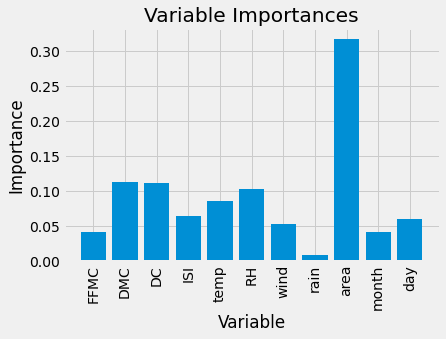

In [50]:
# Set the style
plt.style.use('fivethirtyeight')

importances = feature_model.feature_importances_
feature_list = list(X.columns)

# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Ploting data in 2D using t-SNE

In [51]:
from sklearn.manifold import TSNE

In [52]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [53]:
data_tsne = TSNE(n_components = 2).fit_transform(X)
data_tsne = pd.DataFrame(data_tsne , columns =['tsne1','tsne2'])
data_tsne['y'] = y
data_tsne

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,tsne1,tsne2,y
0,-20.687643,7.501428,0.0
1,-9.709032,-6.962574,0.0
2,-9.582943,-6.831713,0.0
3,-17.331861,16.393307,0.0
4,-17.017349,17.482292,0.0
...,...,...,...
496,-12.185069,-3.319023,0.0
497,-12.226528,-3.608840,1.0
498,-12.738633,12.227744,1.0
499,-13.243546,12.116522,1.0


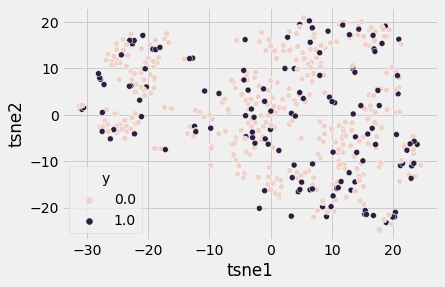

In [54]:
sns.scatterplot(x='tsne1', y='tsne2', data=data_tsne , hue = data_tsne.y)
plt.show()

## Model Building

In [55]:
from sklearn.model_selection import train_test_split , GridSearchCV , KFold , cross_val_score ,RandomizedSearchCV  
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report , accuracy_score , f1_score

In [56]:
final_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,0.207547,0.259259,0.0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,0.266667,0.322581,0.0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,0.266667,0.308642,0.0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,0.207547,0.259259,0.0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,0.207547,0.266667,0.0


In [57]:
# Spliting into X and y
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]

In [58]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,stratify = y, random_state = 42)

In [59]:
data_get_dummies.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.025198,-1.108416,-0.505104,-1.612183,-0.618468,-0.619558,-0.213630,-2.302585,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
1,0.031885,-1.041676,-0.117694,-1.479946,-0.367844,-1.078007,-1.319427,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
2,0.031885,-0.985249,-0.098938,-1.479946,-0.460348,-1.078007,-1.192385,-2.302585,-2.302585,0,...,0,0,0,0,0,0,0,1,0,0
3,0.051824,-1.056489,-0.509682,-1.316436,-0.616190,0.062966,-0.606677,-2.030651,-2.302585,1,...,0,0,0,0,1,0,0,0,0,0
4,0.011583,-0.936199,-0.502809,-1.277886,-0.542331,0.085044,-1.055764,-2.302585,-2.302585,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
# Spliting into X and y
X_gd = data_get_dummies.iloc[:,:-1]
y_gd = data_get_dummies.iloc[:,-1]

In [61]:
# split X and y into training and testing sets
X_gd_train, X_gd_test, y_gd_train, y_gd_test = train_test_split(X_gd, y_gd, test_size = 0.2 ,stratify = y, random_state = 42)

In [62]:
X_train.shape , X_gd_train.shape

((400, 11), (400, 28))

In [63]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11,  activation='relu'))

model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# Fit the model
result = model.fit(X, y, validation_split=0.20, epochs=200, batch_size=50)

Epoch 1/200
8/8 [==============================] - 3s 72ms/step - loss: 1.2620 - accuracy: 0.2625 - val_loss: 1.1371 - val_accuracy: 0.2970
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 1.1741 - accuracy: 0.2625 - val_loss: 1.0646 - val_accuracy: 0.2970
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 1.0947 - accuracy: 0.2625 - val_loss: 0.9974 - val_accuracy: 0.2970
Epoch 4/200
8/8 [==============================] - 0s 10ms/step - loss: 1.0192 - accuracy: 0.2625 - val_loss: 0.9369 - val_accuracy: 0.2970
Epoch 5/200
8/8 [==============================] - 0s 13ms/step - loss: 0.9523 - accuracy: 0.2625 - val_loss: 0.8822 - val_accuracy: 0.2970
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.8911 - accuracy: 0.2625 - val_loss: 0.8337 - val_accuracy: 0.2970
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8364 - accuracy: 0.2625 - val_loss: 0.7912 - val_accuracy: 0.2970
Epoch 8/200
8/8 [======

In [66]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7844
accuracy: 78.44%


In [67]:
# Visualize training history

# list all data in history
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

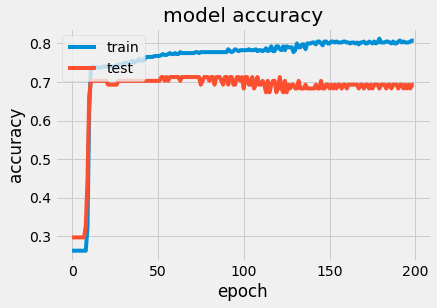

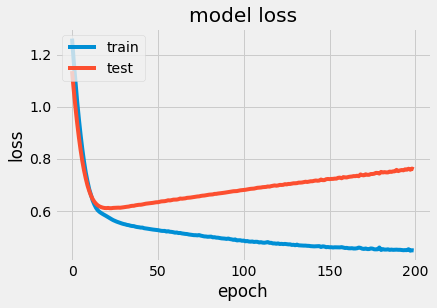

In [68]:
# summarize history for accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyperparameter Tunning

#### Tuning of Hyperparameters :- Batch Size and Epochs

In [69]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [70]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,)

# Define the grid search parameters
batch_size = [10,20,40,50]
epochs = [50,100,200,500]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

kfold = KFold(n_splits=5,shuffle=True, random_state=42)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = kfold ,verbose = 10)

grid_result = grid.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=50...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=50;, score=0.743 total time=  11.6s
[CV 2/5; 1/16] START batch_size=10, epochs=50...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=50;, score=0.780 total time=   5.8s
[CV 3/5; 1/16] START batch_size=10, epochs=50...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=50;, score=0.750 total time=   5.9s
[CV 4/5; 1/16] START batch_size=10, epochs=50...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=50;, score=0.770 total time=   5.7s
[CV 5/5; 1/16] START batch_size=10, epochs=50...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=50;, score=0.800 total time=   5.1s
[CV 1/5; 2/16] START batch_size=10, epochs=100..................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=100;

In [71]:
# Summarize the results
batch_epoch = grid_result.best_params_
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7805148482322692, using {'batch_size': 20, 'epochs': 500}
0.7685148477554321,0.020693681036079194 with: {'batch_size': 10, 'epochs': 50}
0.7744752526283264,0.018209798049015145 with: {'batch_size': 10, 'epochs': 100}
0.778514850139618,0.031271889408531754 with: {'batch_size': 10, 'epochs': 200}
0.7765742659568786,0.04085971506011144 with: {'batch_size': 10, 'epochs': 500}
0.744475257396698,0.014146064638279951 with: {'batch_size': 20, 'epochs': 50}
0.7665148496627807,0.02093532606114429 with: {'batch_size': 20, 'epochs': 100}
0.7645148515701294,0.03521857400431001 with: {'batch_size': 20, 'epochs': 200}
0.7805148482322692,0.02756577540648282 with: {'batch_size': 20, 'epochs': 500}
0.7285544633865356,0.014434626701831097 with: {'batch_size': 40, 'epochs': 50}
0.7625346541404724,0.03497034213715461 with: {'batch_size': 40, 'epochs': 100}
0.762514853477478,0.02518742596058826 with: {'batch_size': 40, 'epochs': 200}
0.7804950475692749,0.027771875636391923 with: {'batch_size': 40, 

#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [72]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 12,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer = 'normal', activation = 'sigmoid'))


    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [73]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

kfold = KFold(n_splits=5,shuffle=True, random_state=42)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = kfold,verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.743 total time=   7.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.760 total time=   9.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=  10.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.710 total time=  10.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   9.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.723 total time=   7.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.790 total time=   9.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.760 total time=   9.7s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.770 total time=   9.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.830 total time=  10.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.733 total time=  10.9s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.720 total time=   9.6s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.740 total time=  10.9s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.710 total time=   9.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   9.6s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.743 total time=  10.8s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.720 total time=  10.9s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.740 total time=  11.3s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.710 total time=  11.2s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.790 total time=  10.2s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.743 total time=   8.1s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.720 total time=  10.9s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.740 total time=  10.9s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.710 total time=  10.9s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.800 total time=  10.1s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.733 total time=  10.8s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.720 total time=  10.1s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.740 total time=  10.9s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.710 total time=  10.4s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=  10.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.733 total time=  10.9s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.720 total time=  10.1s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.760 total time=  10.1s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.710 total time=  10.9s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.790 total time=  10.9s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.733 total time=   7.9s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.720 total time=  10.9s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.740 total time=  10.1s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.710 total time=  10.9s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=  10.1s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.733 total time=   8.4s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.720 total time=  11.0s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.740 total time=  11.1s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.710 total time=  10.4s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=  11.0s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [74]:
# Summarize the results
lrn_drop_rate = grid_result.best_params_
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.774554455280304, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7425148487091064,0.017175595915424315 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.774554455280304,0.03528948669540859 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305346608161927,0.014182507756917262 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7405148625373841,0.02758732955929299 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7425148606300354,0.031225008704654177 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305346608161927,0.014182507756917262 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7425346612930298,0.02905704763269564 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7305346608161927,0.014182507756917262 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305346608161927,0.014182507756917262 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [75]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 12,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = init , activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [76]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

kfold = KFold(n_splits=5,shuffle=True, random_state=42)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = kfold ,verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.733 total time=  10.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.770 total time=  10.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.760 total time=   9.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.810 total time=  10.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.810 total time=  10.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.733 total time=  11.2s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.770 total time=   9.9s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.770 total time=   9.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.770 total time=   9.9s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.810 total time=  10.9s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.733 total time=   7.8s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.720 total time=  10.0s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.740 total time=  10.9s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.710 total time=  10.9s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=  10.9s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.733 total time=   7.4s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.800 total time=   9.6s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.760 total time=   9.9s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.770 total time=   9.6s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.830 total time=  10.9s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.743 total time=  10.9s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.800 total time=  10.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.760 total time=   9.6s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.770 total time=   9.4s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.800 total time=   9.6s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.733 total time=  10.9s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.720 total time=   9.6s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.740 total time=   9.6s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.710 total time=   9.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=  11.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.713 total time=   7.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.790 total time=  10.9s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.760 total time=  10.9s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.790 total time=   9.5s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.810 total time=  10.9s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.743 total time=  10.8s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.790 total time=  10.9s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.760 total time=  10.9s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.770 total time=  10.9s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.830 total time=  10.9s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.733 total time=   7.5s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.720 total time=  11.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.740 total time=   9.6s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.710 total time=   9.6s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=  10.8s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.743 total time=   7.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.760 total time=   9.4s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.770 total time=  10.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=  10.8s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.790 total time=  10.9s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.762 total time=   7.5s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.760 total time=   9.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.740 total time=   9.8s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.740 total time=   9.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.790 total time=  10.9s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.733 total time=  10.8s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.720 total time=   9.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.740 total time=   9.5s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.710 total time=  10.9s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   9.6s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [77]:
# Summarize the results
act_fun_kernel = grid_result.best_params_
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7785346508026123, using {'activation_function': 'relu', 'init': 'uniform'}
0.7765346527099609,0.02993250947097978 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7705346465110778,0.02446162067575383 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305346608161927,0.014182507756917262 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7785346508026123,0.033553184813987995 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7745148539543152,0.022584297673885152 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305346608161927,0.014182507756917262 with: {'activation_function': 'relu', 'init': 'zero'}
0.772574269771576,0.033854260119752094 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.778514850139618,0.029965500492520704 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305346608161927,0.014182507756917262 with: {'activation_function': 'tanh', 'init': 'zero'}
0.762514853477478,0.016565230899294587 with: {'act

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [78]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'normal',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'normal',activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [79]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
neuron1 = [4,8,12,16]
neuron2 = [2,4,8,10]

# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

kfold = KFold(n_splits=5,shuffle=True, random_state=42)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = kfold ,verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.743 total time=   7.7s
[CV 2/5; 1/16] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.790 total time=   9.9s
[CV 3/5; 1/16] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.730 total time=  10.9s
[CV 4/5; 1/16] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.790 total time=  10.2s
[CV 5/5; 1/16] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.800 total time=  10.0s
[CV 1/5; 2/16] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.743 total time=   8.2s
[CV 2/5; 2/16] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.770 total time=  16.1s
[CV 3/5; 2/16] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.760 total time=  10.9s
[CV 4/5; 2/16] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.780 total time=  10.9s
[CV 5/5; 2/16] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.810 total time=  10.9s
[CV 1/5; 3/16] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.733 total time=   8.1s
[CV 2/5; 3/16] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.790 total time=  11.6s
[CV 3/5; 3/16] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.770 total time=  10.0s
[CV 4/5; 3/16] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.810 total time=  10.0s
[CV 5/5; 3/16] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.690 total time=  10.9s
[CV 1/5; 4/16] START neuron1=4, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/16] END .......neuron1=4, neuron2=10;, score=0.743 total time=   8.1s
[CV 2/5; 4/16] START neuron1=4, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/16] END .......neuron1=4, neuron2=10;, score=0.790 total time=  10.9s
[CV 3/5; 4/16] START neuron1=4, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/16] END .......neuron1=4, neuron2=10;, score=0.750 total time=  10.0s
[CV 4/5; 4/16] START neuron1=4, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/16] END .......neuron1=4, neuron2=10;, score=0.760 total time=  10.9s
[CV 5/5; 4/16] START neuron1=4, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/16] END .......neuron1=4, neuron2=10;, score=0.810 total time=  10.9s
[CV 1/5; 5/16] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.743 total time=  10.9s
[CV 2/5; 5/16] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.780 total time=  10.9s
[CV 3/5; 5/16] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.760 total time=  10.9s
[CV 4/5; 5/16] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.740 total time=   9.9s
[CV 5/5; 5/16] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.800 total time=  10.9s
[CV 1/5; 6/16] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.723 total time=   7.6s
[CV 2/5; 6/16] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.790 total time=  10.9s
[CV 3/5; 6/16] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.760 total time=  10.4s
[CV 4/5; 6/16] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.760 total time=  10.9s
[CV 5/5; 6/16] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.820 total time=  10.9s
[CV 1/5; 7/16] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.743 total time=  10.8s
[CV 2/5; 7/16] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.790 total time=  10.9s
[CV 3/5; 7/16] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.770 total time=  10.9s
[CV 4/5; 7/16] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.800 total time=  10.9s
[CV 5/5; 7/16] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.810 total time=  10.2s
[CV 1/5; 8/16] START neuron1=8, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/16] END .......neuron1=8, neuron2=10;, score=0.683 total time=  10.9s
[CV 2/5; 8/16] START neuron1=8, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/16] END .......neuron1=8, neuron2=10;, score=0.760 total time=  10.9s
[CV 3/5; 8/16] START neuron1=8, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/16] END .......neuron1=8, neuron2=10;, score=0.750 total time=  10.9s
[CV 4/5; 8/16] START neuron1=8, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/16] END .......neuron1=8, neuron2=10;, score=0.760 total time=  11.2s
[CV 5/5; 8/16] START neuron1=8, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/16] END .......neuron1=8, neuron2=10;, score=0.770 total time=  10.9s
[CV 1/5; 9/16] START neuron1=12, neuron2=2......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/16] END .......neuron1=12, neuron2=2;, score=0.743 total time=   7.7s
[CV 2/5; 9/16] START neuron1=12, neuron2=2......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/16] END .......neuron1=12, neuron2=2;, score=0.790 total time=   9.8s
[CV 3/5; 9/16] START neuron1=12, neuron2=2......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/16] END .......neuron1=12, neuron2=2;, score=0.740 total time=  10.9s
[CV 4/5; 9/16] START neuron1=12, neuron2=2......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/16] END .......neuron1=12, neuron2=2;, score=0.770 total time=   9.9s
[CV 5/5; 9/16] START neuron1=12, neuron2=2......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/16] END .......neuron1=12, neuron2=2;, score=0.820 total time=   9.9s
[CV 1/5; 10/16] START neuron1=12, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/16] END ......neuron1=12, neuron2=4;, score=0.743 total time=   7.7s
[CV 2/5; 10/16] START neuron1=12, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/16] END ......neuron1=12, neuron2=4;, score=0.790 total time=  10.9s
[CV 3/5; 10/16] START neuron1=12, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/16] END ......neuron1=12, neuron2=4;, score=0.760 total time=   9.9s
[CV 4/5; 10/16] START neuron1=12, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/16] END ......neuron1=12, neuron2=4;, score=0.770 total time=   9.8s
[CV 5/5; 10/16] START neuron1=12, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/16] END ......neuron1=12, neuron2=4;, score=0.810 total time=  10.9s
[CV 1/5; 11/16] START neuron1=12, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.713 total time=  11.3s
[CV 2/5; 11/16] START neuron1=12, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.790 total time=  10.9s
[CV 3/5; 11/16] START neuron1=12, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.760 total time=   9.9s
[CV 4/5; 11/16] START neuron1=12, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.790 total time=  10.9s
[CV 5/5; 11/16] START neuron1=12, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.800 total time=   9.9s
[CV 1/5; 12/16] START neuron1=12, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/16] END .....neuron1=12, neuron2=10;, score=0.713 total time=  10.9s
[CV 2/5; 12/16] START neuron1=12, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/16] END .....neuron1=12, neuron2=10;, score=0.780 total time=   9.9s
[CV 3/5; 12/16] START neuron1=12, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/16] END .....neuron1=12, neuron2=10;, score=0.750 total time=   9.8s
[CV 4/5; 12/16] START neuron1=12, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/16] END .....neuron1=12, neuron2=10;, score=0.750 total time=   9.9s
[CV 5/5; 12/16] START neuron1=12, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/16] END .....neuron1=12, neuron2=10;, score=0.800 total time=  10.7s
[CV 1/5; 13/16] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 13/16] END ......neuron1=16, neuron2=2;, score=0.733 total time=  11.0s
[CV 2/5; 13/16] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 13/16] END ......neuron1=16, neuron2=2;, score=0.760 total time=   9.8s
[CV 3/5; 13/16] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 13/16] END ......neuron1=16, neuron2=2;, score=0.740 total time=  10.3s
[CV 4/5; 13/16] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 13/16] END ......neuron1=16, neuron2=2;, score=0.770 total time=  10.9s
[CV 5/5; 13/16] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 13/16] END ......neuron1=16, neuron2=2;, score=0.820 total time=  10.0s
[CV 1/5; 14/16] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 14/16] END ......neuron1=16, neuron2=4;, score=0.733 total time=   7.8s
[CV 2/5; 14/16] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 14/16] END ......neuron1=16, neuron2=4;, score=0.780 total time=   9.9s
[CV 3/5; 14/16] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 14/16] END ......neuron1=16, neuron2=4;, score=0.770 total time=   9.9s
[CV 4/5; 14/16] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 14/16] END ......neuron1=16, neuron2=4;, score=0.790 total time=   9.8s
[CV 5/5; 14/16] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 14/16] END ......neuron1=16, neuron2=4;, score=0.810 total time=   9.8s
[CV 1/5; 15/16] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 15/16] END ......neuron1=16, neuron2=8;, score=0.723 total time=  10.9s
[CV 2/5; 15/16] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 15/16] END ......neuron1=16, neuron2=8;, score=0.780 total time=  10.0s
[CV 3/5; 15/16] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 15/16] END ......neuron1=16, neuron2=8;, score=0.770 total time=   9.8s
[CV 4/5; 15/16] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 15/16] END ......neuron1=16, neuron2=8;, score=0.770 total time=   9.7s
[CV 5/5; 15/16] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 15/16] END ......neuron1=16, neuron2=8;, score=0.810 total time=   9.8s
[CV 1/5; 16/16] START neuron1=16, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 16/16] END .....neuron1=16, neuron2=10;, score=0.733 total time=   8.0s
[CV 2/5; 16/16] START neuron1=16, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 16/16] END .....neuron1=16, neuron2=10;, score=0.800 total time=  10.9s
[CV 3/5; 16/16] START neuron1=16, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 16/16] END .....neuron1=16, neuron2=10;, score=0.760 total time=   9.9s
[CV 4/5; 16/16] START neuron1=16, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 16/16] END .....neuron1=16, neuron2=10;, score=0.800 total time=  10.9s
[CV 5/5; 16/16] START neuron1=16, neuron2=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 16/16] END .....neuron1=16, neuron2=10;, score=0.800 total time=   9.8s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [80]:
# Summarize the results
neu1_neu2 = grid_result.best_params_
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7825148582458497, using {'neuron1': 8, 'neuron2': 8}
0.7705148696899414,0.028463470867109996 with: {'neuron1': 4, 'neuron2': 2}
0.7725148439407349,0.022452385289965664 with: {'neuron1': 4, 'neuron2': 4}
0.7585346579551697,0.04274579409399937 with: {'neuron1': 4, 'neuron2': 8}
0.7705148577690124,0.025498416673102577 with: {'neuron1': 4, 'neuron2': 10}
0.7645148515701294,0.022811119709931712 with: {'neuron1': 8, 'neuron2': 2}
0.7705544590950012,0.032646344433590366 with: {'neuron1': 8, 'neuron2': 4}
0.7825148582458497,0.023954389145791545 with: {'neuron1': 8, 'neuron2': 8}
0.7446336507797241,0.03137670321727475 with: {'neuron1': 8, 'neuron2': 10}
0.7725148558616638,0.030068413619055365 with: {'neuron1': 12, 'neuron2': 2}
0.7745148539543152,0.023453153841834263 with: {'neuron1': 12, 'neuron2': 4}
0.7705742716789246,0.03181836120946008 with: {'neuron1': 12, 'neuron2': 8}
0.7585742592811584,0.029701680947919626 with: {'neuron1': 12, 'neuron2': 10}
0.7645346522331238,0.0308023773314

## Training model with optimum values of Hyperparameters

In [81]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'normal',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'normal',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'normal',activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [82]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model
model.fit(X_train,y_train)

# Predicting using trained model

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Printing the metrics
print(accuracy_score(y_train,y_train_predict))
print(accuracy_score(y_test,y_test_predict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.78
0.8217821782178217
